In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install lime

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 3.0 MB/s  0:00:04m0:00:0100:01
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 4.9 MB/s  0:00:00 eta 0:00:01
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=2c033d7b0d9cccdebe1b02bd7bac497f148d4db747a1f5a09ba2858ba9c43c24
  Stored in directory: /Users/abhilavanya/Library/Caches/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [lime]6/7 [lime]t-image]


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import lime
from lime import lime_tabular

In [5]:

df = pd.read_csv(r'/content/post natal data.csv')
#df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'],errors = 'coerce')

FileNotFoundError: [Errno 2] No such file or directory: '/content/post natal data.csv'

In [6]:
df.drop('Timestamp', axis=1, inplace=True)

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling anxious                            1503 non-null   object
 7   Feeling of guilt                           1494 non-null   object
 8   Problems of bonding with baby              1503 non-null   object
 9   Suicide attempt                            1503 non-null   object
dtypes: object(10)
memory usage: 117.5+ K

In [ ]:
for col in df:
    print(col, df[col].unique())

Age ['35-40' '40-45' '30-35' '45-50' '25-30']
Feeling sad or Tearful ['Yes' 'No' 'Sometimes']
Irritable towards baby & partner ['Yes' 'No' 'Sometimes' nan]
Trouble sleeping at night ['Two or more days a week' 'No' 'Yes']
Problems concentrating or making decision ['Yes' 'No' 'Often' nan]
Overeating or loss of appetite ['Yes' 'No' 'Not at all']
Feeling anxious ['Yes' 'No']
Feeling of guilt ['No' 'Yes' 'Maybe' nan]
Problems of bonding with baby ['Yes' 'Sometimes' 'No']
Suicide attempt ['Yes' 'No' 'Not interested to say']


In [ ]:
df.isna().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.head(5)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


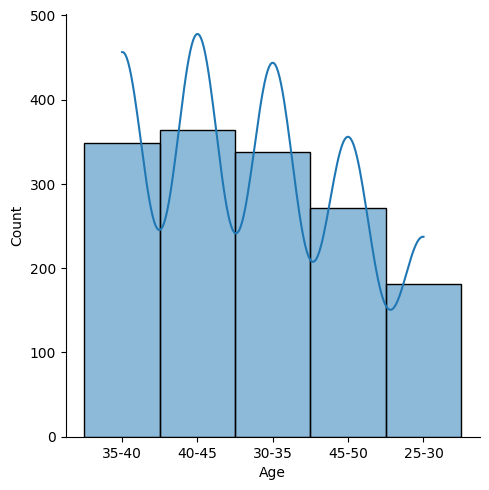

In [ ]:
sns.displot(df['Age'], kde=True)

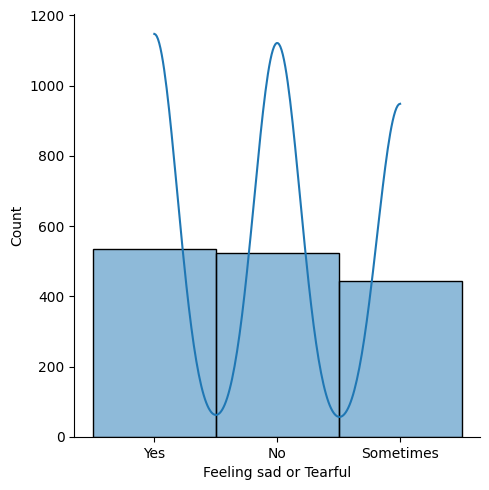

In [ ]:
sns.displot(df['Feeling sad or Tearful'], kde=True)

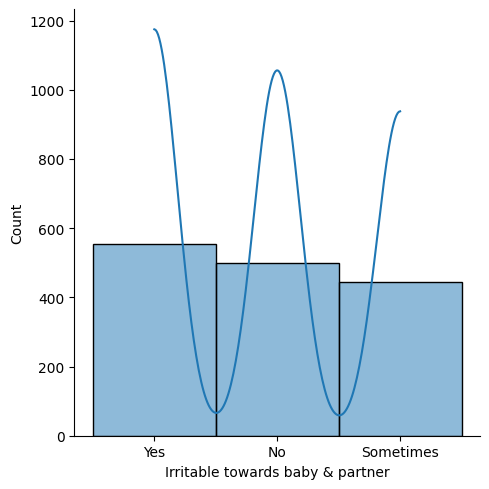

In [ ]:
sns.displot(df['Irritable towards baby & partner'], kde=True)

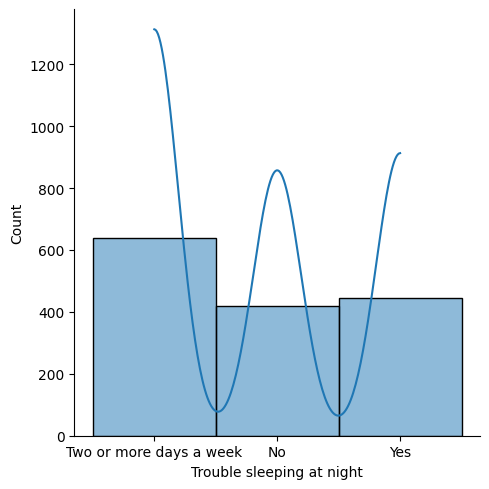

In [ ]:
sns.displot(df['Trouble sleeping at night'], kde=True)

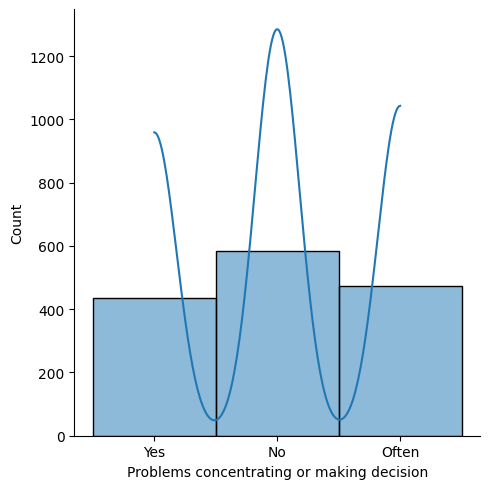

In [ ]:
sns.displot(df['Problems concentrating or making decision'], kde=True)

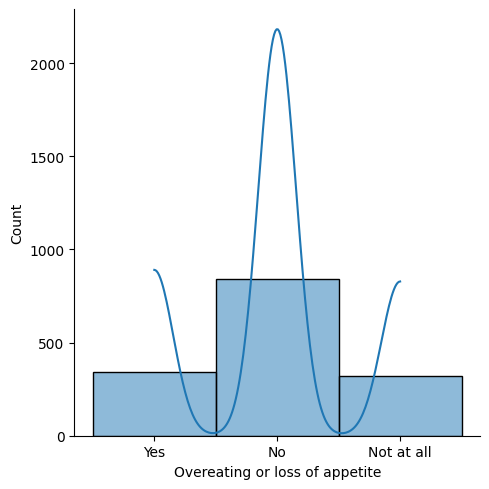

In [ ]:
sns.displot(df['Overeating or loss of appetite'], kde=True)

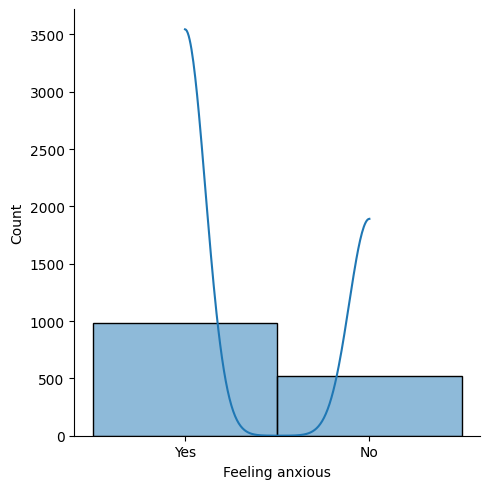

In [ ]:
sns.displot(df['Feeling anxious'], kde=True)

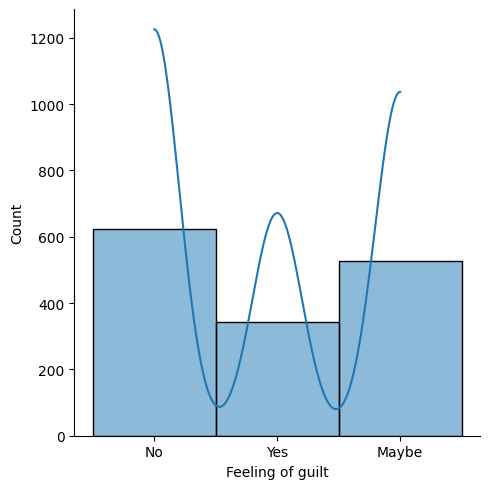

In [ ]:
sns.displot(df['Feeling of guilt'], kde=True)

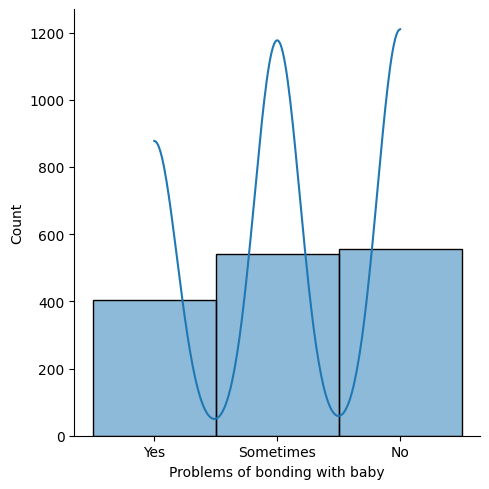

In [ ]:
sns.displot(df['Problems of bonding with baby'], kde=True)

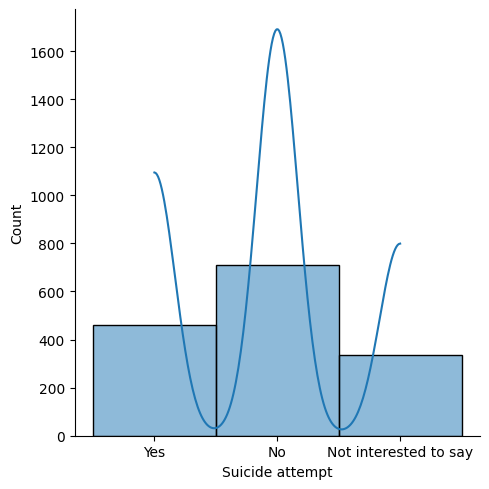

In [ ]:
sns.displot(df['Suicide attempt'], kde=True)

In [ ]:
age_dic = {'35-40':3, '40-45':4, '30-35':2,  '45-50':5, '25-30':1}
df['Age'].replace(age_dic, inplace=True)
df['Age']

0       3
1       4
2       3
3       3
4       4
       ..
1498    2
1499    1
1500    1
1501    1
1502    5
Name: Age, Length: 1491, dtype: int64

In [ ]:
df_dic = {'Yes':1, 'No':0, 'Sometimes':2, 'Two or more days a week':2, 'Often':2, 'Not at all':2,'Not interested to say':2,'Maybe':2 }
df.replace(df_dic, inplace=True)
df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,3,1,1,2,1,1,1,0,1,1
1,4,1,0,0,1,1,0,1,1,0
2,3,1,0,1,1,1,1,0,2,0
3,3,1,1,1,1,0,1,2,0,0
4,4,1,0,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1498,2,1,0,2,0,0,1,2,2,0
1499,1,2,0,0,2,0,1,2,1,0
1500,1,0,2,2,0,0,0,1,0,2
1501,1,0,2,1,2,0,1,0,0,0


In [ ]:
"""label_encoders = {}
for column in ['Age','Feeling sad or Tearful', 'Irritable towards baby & partner',
               'Trouble sleeping at night', 'Problems concentrating or making decision',
               'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
               'Problems of bonding with baby', 'Suicide attempt']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])"""


**Class Distribution**

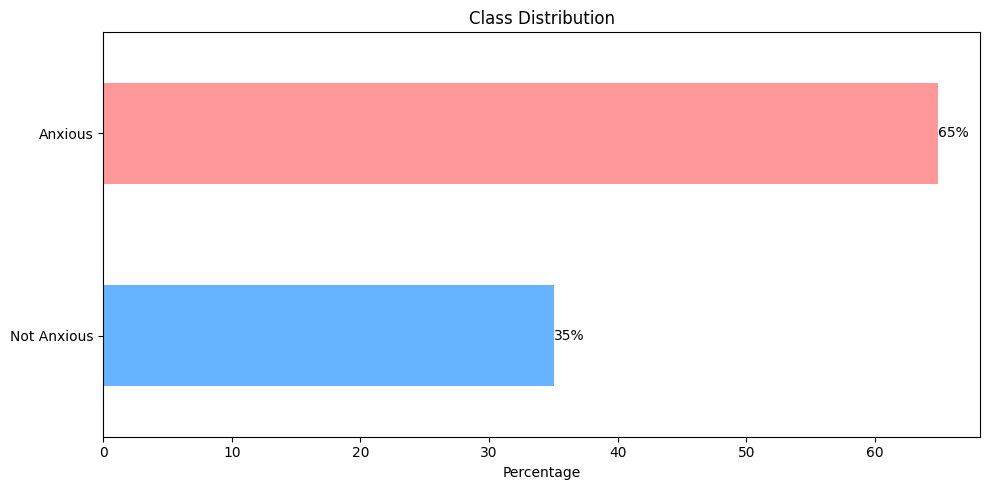

In [ ]:
# Calculate class distribution for the 'Feeling anxious' column
class_distribution = df['Feeling anxious'].value_counts(normalize=True) * 100

# Create a horizontal bar plot for class distribution
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='barh', color=['#ff9999', '#66b3ff'])

# Invert y-axis to have 'Not Anxious' at the bottom
plt.gca().invert_yaxis()

# Add the percentage text on each bar
for index, value in enumerate(class_distribution):
    plt.text(value, index, f'{value:.0f}%', va='center')

# Set plot title and labels
plt.title('Class Distribution')
plt.xlabel('Percentage')
plt.yticks(ticks=range(len(class_distribution)), labels=['Anxious', 'Not Anxious'])

# Show the plot
plt.tight_layout()
plt.show()

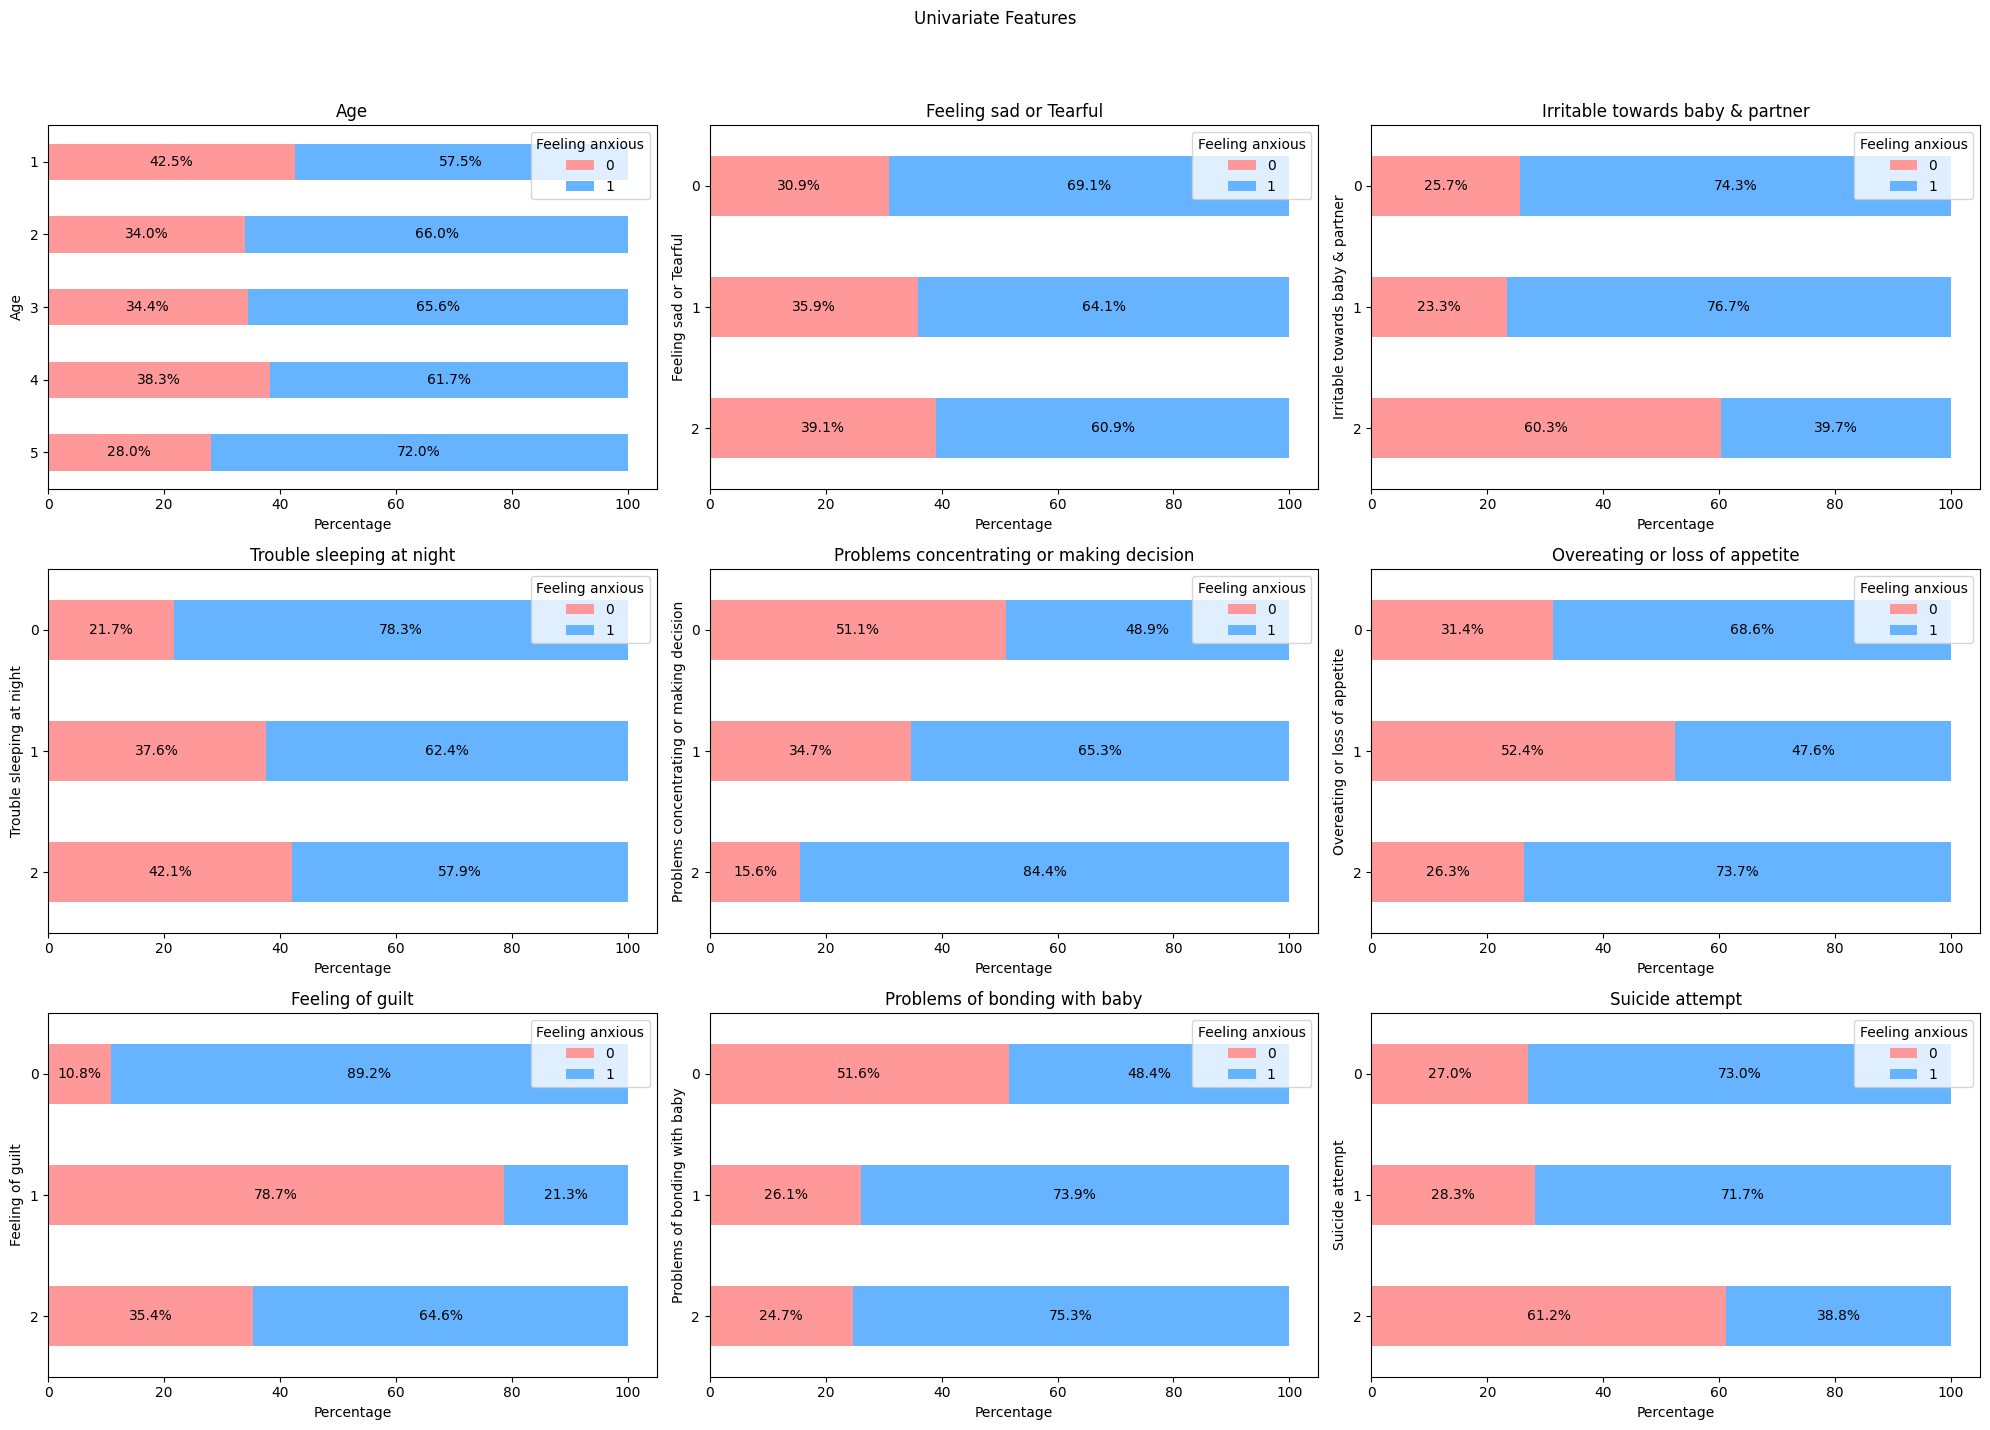

In [ ]:
# Apply your preprocessing steps here...

# Define the features to plot
features = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
            'Trouble sleeping at night', 'Problems concentrating or making decision',
            'Overeating or loss of appetite', 'Feeling of guilt',
            'Problems of bonding with baby', 'Suicide attempt']

# Set up the matplotlib figure (e.g., 3 rows, 3 columns if you have 9 features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle('Univariate Features')

# Flatten axes array for easy looping
axes = axes.flatten()

# Loop through the features and create a stacked bar plot for each
for i, feature in enumerate(features):
    # Calculate the distribution and percentages
    distribution = pd.crosstab(df[feature], df['Feeling anxious'], normalize='index') * 100

    # Plot stacked bar chart
    distribution.plot(kind='barh', stacked=True, ax=axes[i], color=['#ff9999', '#66b3ff'])
    axes[i].set_title(feature)
    axes[i].invert_yaxis()  # To match the example image
    axes[i].set_xlabel('Percentage')

    # Annotate percentages on the bars
    for rects in axes[i].containers:
        axes[i].bar_label(rects, fmt='%.1f%%', label_type='center')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

In [ ]:
print(df.columns)

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')


In [ ]:
# Separating the features (X) and the target variable (y)
x = df.drop('Feeling anxious', axis=1)
y = df['Feeling anxious']
print(x.shape, y.shape)

(1491, 9) (1491,)


<Axes: >

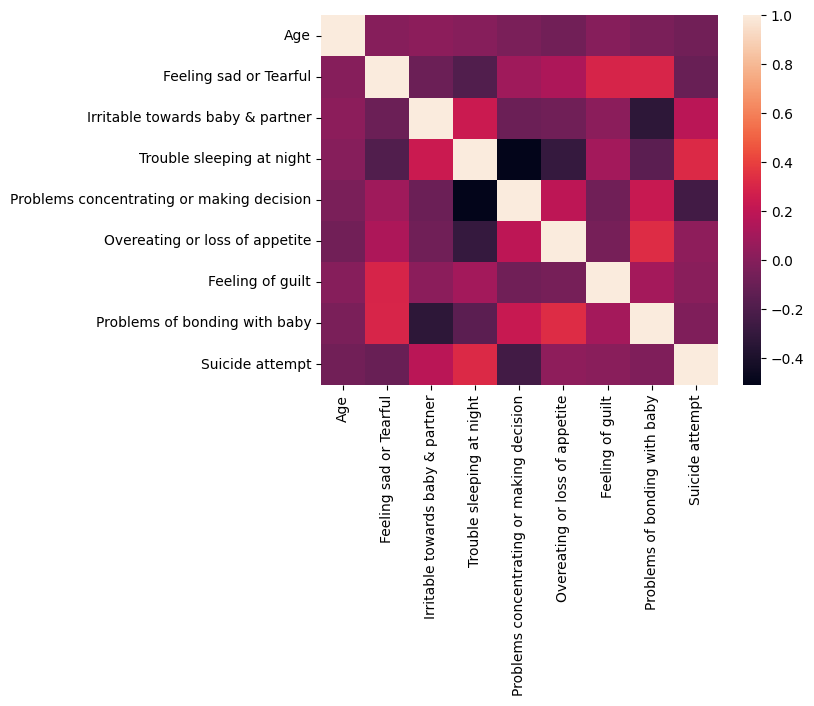

In [ ]:
#Heatmap
corr = x.corr()
sns.heatmap(corr)

In [ ]:
#Standardisation
meanX = x.mean()
stdX = np.std(x)

x = (x - meanX) / stdX
x

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,-0.104067,0.065199,0.047305,1.02955,0.088003,0.431485,-1.070798,0.011751,0.309667
1,0.671753,0.065199,-1.212196,-1.38977,0.088003,0.431485,0.071233,0.011751,-0.944988
2,-0.104067,0.065199,-1.212196,-0.18011,0.088003,0.431485,-1.070798,1.179794,-0.944988
3,-0.104067,0.065199,0.047305,-0.18011,0.088003,-0.808100,1.213264,-1.156292,-0.944988
4,0.671753,0.065199,-1.212196,1.02955,0.088003,-0.808100,-1.070798,0.011751,-0.944988
...,...,...,...,...,...,...,...,...,...
1498,-0.879887,0.065199,-1.212196,1.02955,-1.104837,-0.808100,1.213264,1.179794,-0.944988
1499,-1.655706,1.311495,-1.212196,-1.38977,1.280843,-0.808100,1.213264,0.011751,-0.944988
1500,-1.655706,-1.181098,1.306807,1.02955,-1.104837,-0.808100,0.071233,-1.156292,1.564322
1501,-1.655706,-1.181098,1.306807,-0.18011,1.280843,-0.808100,-1.070798,-1.156292,-0.944988


In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1192, 9) (1192,) (299, 9) (299,)


**ML Models**

In [ ]:
!pip install lime


**for Anomaly detection IsolationForest**

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Fit the model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
predictions = iso_forest.fit_predict(X_scaled)

# The prediction is -1 for anomalies and 1 for normal observations
df['anomaly'] = predictions

# Count the number of anomalies and normal points
counts = df['anomaly'].value_counts()
anomalies = df[df['anomaly'] == -1]
normal = df[df['anomaly'] == 1]

# Output the counts
print(counts)

# Optionally, show some of the anomalies
print(anomalies.head())

-1    1136
 1     355
Name: anomaly, dtype: int64
   Age  Feeling sad or Tearful  Irritable towards baby & partner  \
0    3                       1                                 1   
1    4                       1                                 0   
2    3                       1                                 0   
3    3                       1                                 1   
4    4                       1                                 0   

   Trouble sleeping at night  Problems concentrating or making decision  \
0                          2                                          1   
1                          0                                          1   
2                          1                                          1   
3                          1                                          1   
4                          2                                          1   

   Overeating or loss of appetite  Feeling anxious  Feeling of guilt  \
0                 

**SGDClassifier**

Training time(seconds): 0.016804933547973633s
Accuracy 0.78
kfold accuracy: 0.7545279642058167
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       115
           1       0.81      0.83      0.82       184

    accuracy                           0.78       299
   macro avg       0.76      0.76      0.76       299
weighted avg       0.77      0.78      0.78       299



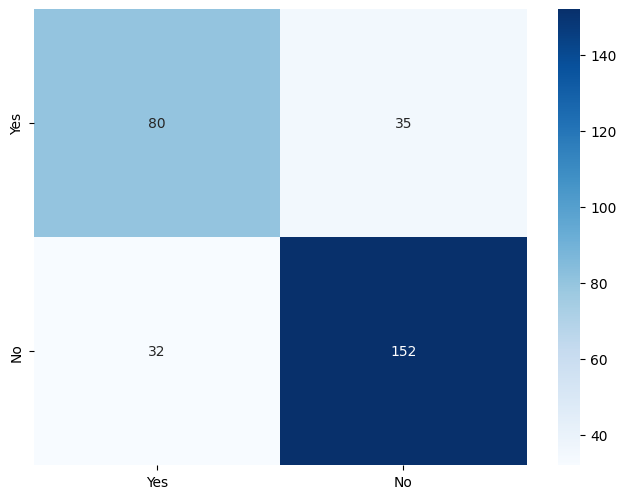

In [ ]:
from sklearn.linear_model import SGDClassifier
import time
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = SGDClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Linear Regression**

Training time(seconds): 0.03833627700805664s
Accuracy 0.78
kfold accuracy: 0.2658630688458654
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       115
           1       0.80      0.87      0.83       184

    accuracy                           0.78       299
   macro avg       0.78      0.76      0.76       299
weighted avg       0.78      0.78      0.78       299



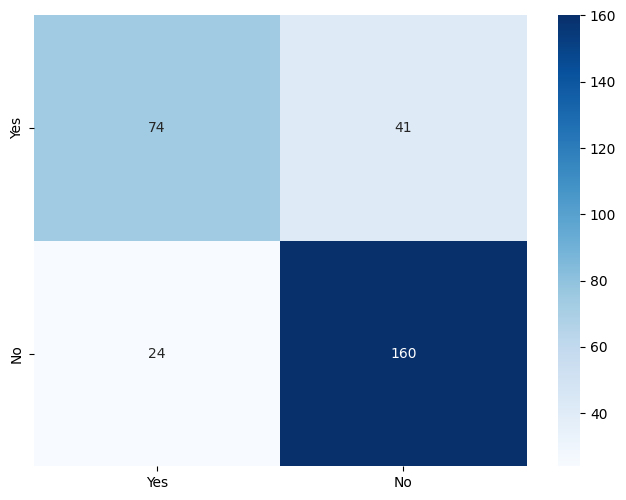

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = LinearRegression()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Random Forest**

Training time(seconds): 0.2157881259918213s
Accuracy 0.99
kfold accuracy: 0.993297539149888
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.99      1.00      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



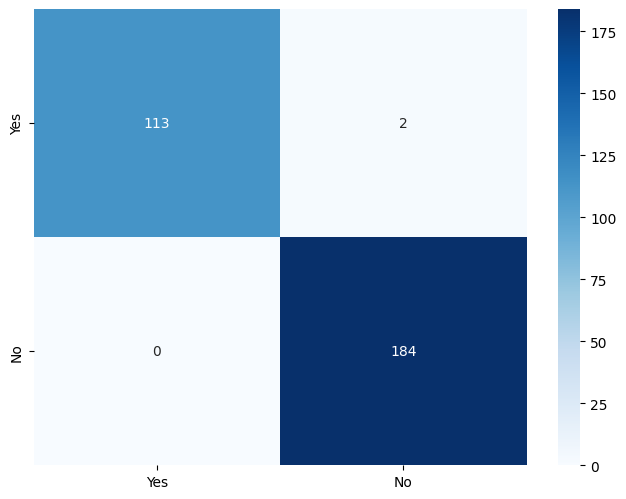

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = RandomForestClassifier(max_depth=4, random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Bayesian Ridge Regression**


Training time(seconds): 0.021680831909179688s
Accuracy 0.79
kfold accuracy: 0.26605677827971136
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       115
           1       0.80      0.88      0.84       184

    accuracy                           0.79       299
   macro avg       0.78      0.76      0.77       299
weighted avg       0.79      0.79      0.78       299



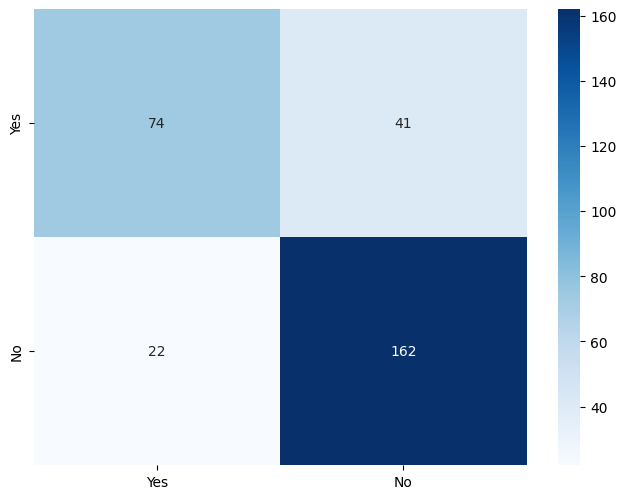

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = linear_model.BayesianRidge()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**SVM**

Training time(seconds): 0.07729053497314453s
Accuracy 0.78
kfold accuracy: 0.7665816554809843
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       115
           1       0.79      0.86      0.83       184

    accuracy                           0.78       299
   macro avg       0.77      0.75      0.76       299
weighted avg       0.77      0.78      0.77       299



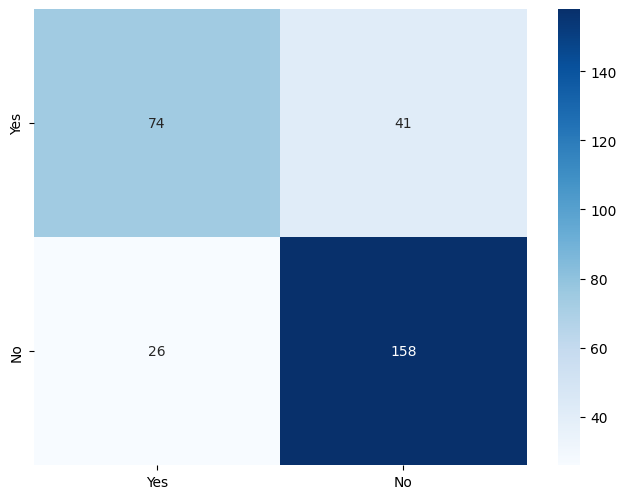

In [ ]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = svm.SVC(kernel='linear')
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**KNeighbour Regression**

Training time(seconds): 0.006369590759277344s
Accuracy 0.89
kfold accuracy: 0.873248322147651
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       115
           1       0.90      0.91      0.91       184

    accuracy                           0.89       299
   macro avg       0.88      0.88      0.88       299
weighted avg       0.89      0.89      0.89       299



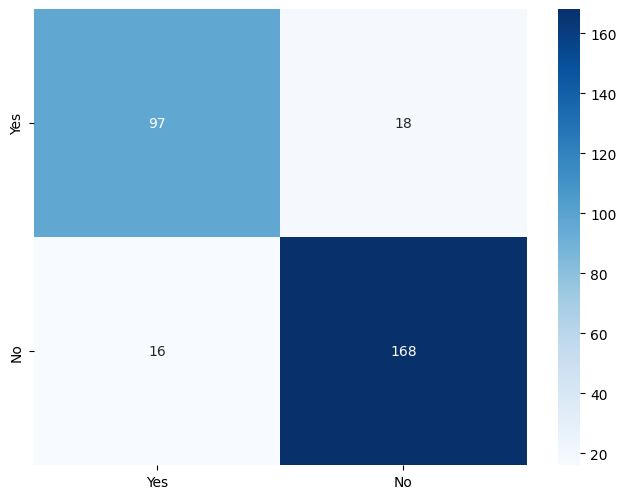

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = KNeighborsClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Neural Networks(MLPClassifier)**

Training time(seconds): 4.897722482681274s
Accuracy 0.92
kfold accuracy: 0.9248903803131991
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       115
           1       0.93      0.94      0.93       184

    accuracy                           0.92       299
   macro avg       0.91      0.91      0.91       299
weighted avg       0.92      0.92      0.92       299



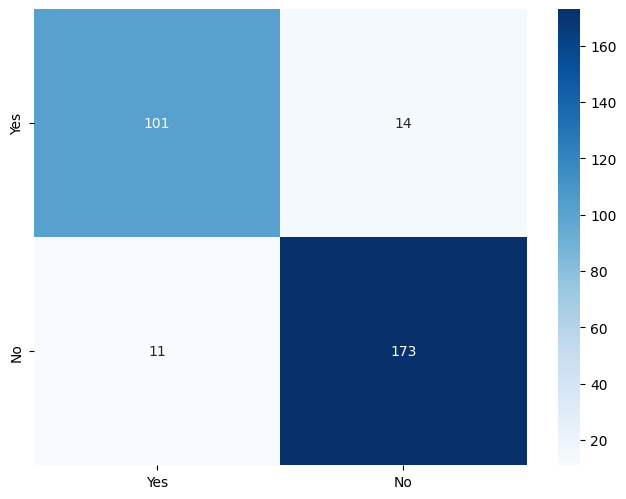

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = MLPClassifier()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Logistic Regression**

Training time(seconds): 0.08332514762878418s
Accuracy 0.79
kfold accuracy: 0.7679194630872483
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       115
           1       0.80      0.88      0.83       184

    accuracy                           0.79       299
   macro avg       0.78      0.76      0.77       299
weighted avg       0.78      0.79      0.78       299



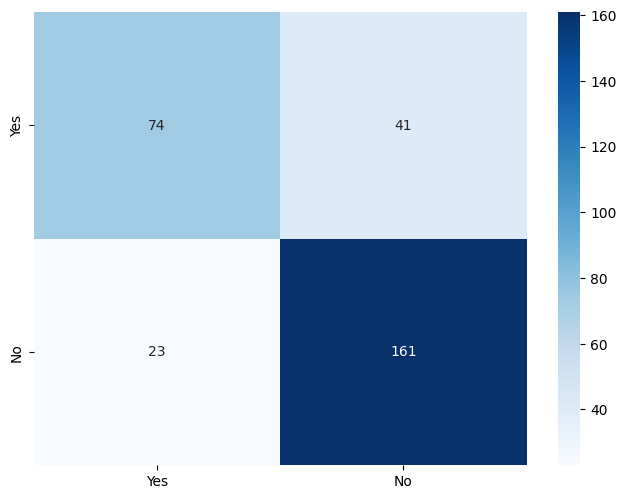

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = LogisticRegression(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Gaussian Naïve Bayes**

Training time(seconds): 0.01008296012878418s
Accuracy 0.77
kfold accuracy: 0.7659015659955257
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       115
           1       0.79      0.84      0.82       184

    accuracy                           0.77       299
   macro avg       0.75      0.74      0.75       299
weighted avg       0.76      0.77      0.76       299



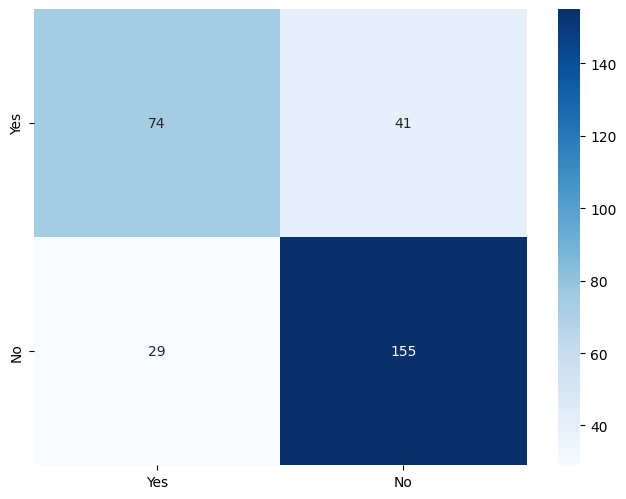

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = GaussianNB()
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Gradient Boosting Classifier  **

Training time(seconds): 0.2530701160430908s
Accuracy 0.92
kfold accuracy: 0.9027427293064877
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       115
           1       0.92      0.96      0.94       184

    accuracy                           0.92       299
   macro avg       0.92      0.91      0.92       299
weighted avg       0.92      0.92      0.92       299



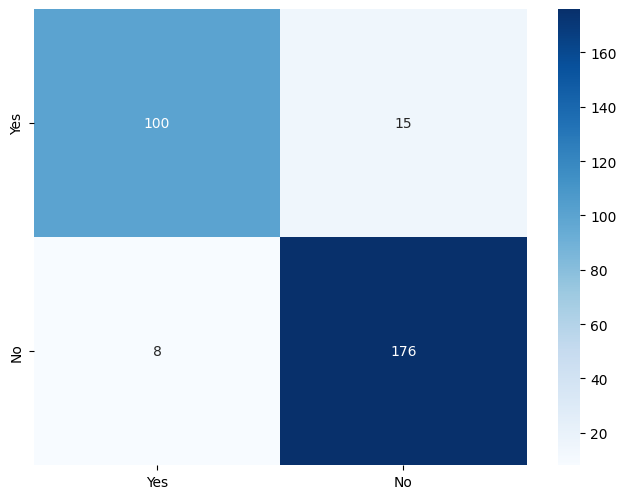

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = GradientBoostingClassifier(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Decision Tree Classifier**

Training time(seconds): 0.021489858627319336s
Accuracy 0.99
kfold accuracy: 0.990612975391499
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.99      0.99      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



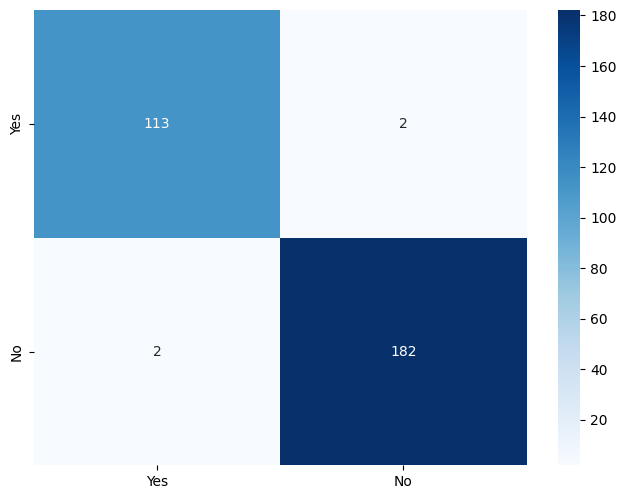

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# create a classifier object
reg = DecisionTreeClassifier(random_state=0)
start = time.time()
reg.fit(X_train,y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")
pred = reg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy',round(accuracy_score(y_test, pred.round()),2))
#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(reg, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, pred.round()))
cf_matrix=confusion_matrix(y_test, pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Meta Learner Model**

Training time(seconds): 14.778547286987305s
Accuracy: 0.91
kfold accuracy: 0.9356152125279642
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       115
           1       0.92      0.94      0.93       184

    accuracy                           0.91       299
   macro avg       0.91      0.90      0.91       299
weighted avg       0.91      0.91      0.91       299



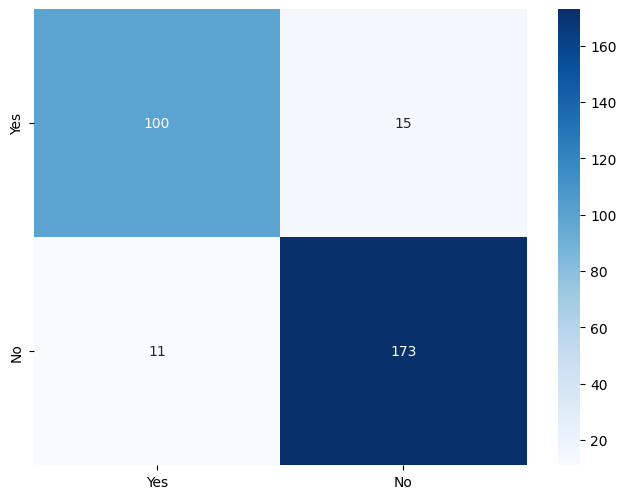

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)

# Define base learners
base_learners = [
    ('dt1', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('dt2', KNeighborsClassifier()),
    ('lr', MLPClassifier())
]

# Define the meta-learner
meta_learner = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the stacking classifier
stacked_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

start = time.time()
# Train the stacked classifier
stacked_classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")

# Evaluate the model
y_pred = stacked_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(stacked_classifier, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))
cf_matrix=confusion_matrix(y_test, y_pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()

**Meta Learner 2**

Training time(seconds): 2.460493326187134s
Accuracy: 0.99
kfold accuracy: 0.9919552572706936
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       115
           1       0.99      1.00      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



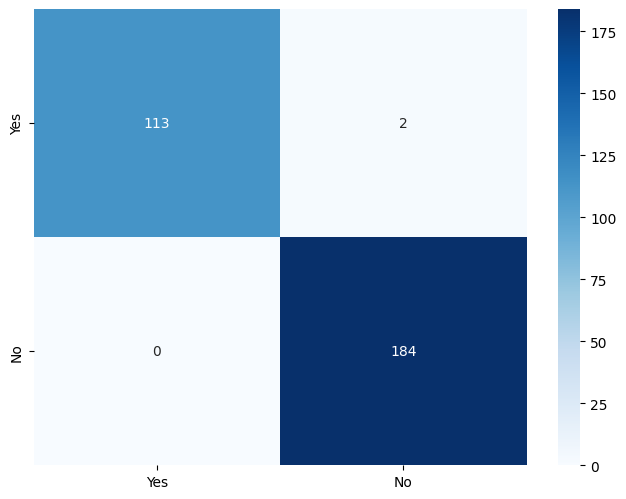

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split( x,y,test_size=0.2,random_state=0,shuffle=True)

# Define base learners
base_learners = [
    ('dt1', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('dt2', KNeighborsClassifier()),
    ('lr', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define the meta-learner
meta_learner = MLPClassifier()

# Create the stacking classifier
stacked_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

start = time.time()
# Train the stacked classifier
stacked_classifier.fit(X_train, y_train)
stop = time.time()
print(f"Training time(seconds): {stop - start}s")

# Evaluate the model
y_pred = stacked_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#view mean absolute error
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(stacked_classifier, x, y,cv=cv)
from numpy import mean
from numpy import absolute
print('kfold accuracy:',mean(absolute(scores)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))
cf_matrix=confusion_matrix(y_test, y_pred.round())
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
plt.tight_layout(pad=0)
# plt.savefig('lrcm.pdf')
plt.show()